In [1]:
import numpy as np
import matplotlib.pyplot as plt
from metrics_amazon import precision_recall_curve

In [2]:
y_preds = np.load('work_dirs/exp02/preds.npy')[:, 1]
print(y_preds.shape)
y_trues = np.load('work_dirs/exp02/labels_patches.npy')[:, 0, :, 0]
print(y_trues.shape)

thresholds = np.arange(0, 1, 0.01)
# print(thresholds)
# print(thresholds.shape)
prec, recall, th = precision_recall_curve(thresholds, y_trues, y_preds)

(19632, 2, 128, 128)
(19632, 2, 128, 128)


PrecisionxRecall: 100%|██████████| 100/100 [12:43<00:00,  7.63s/it]


In [3]:
f1_scores = 2 * prec * recall / (prec + recall)

/tmp/ipykernel_554860/894098839.py:1: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * prec * recall / (prec + recall)


In [4]:
print(f1_scores.shape)

(100,)


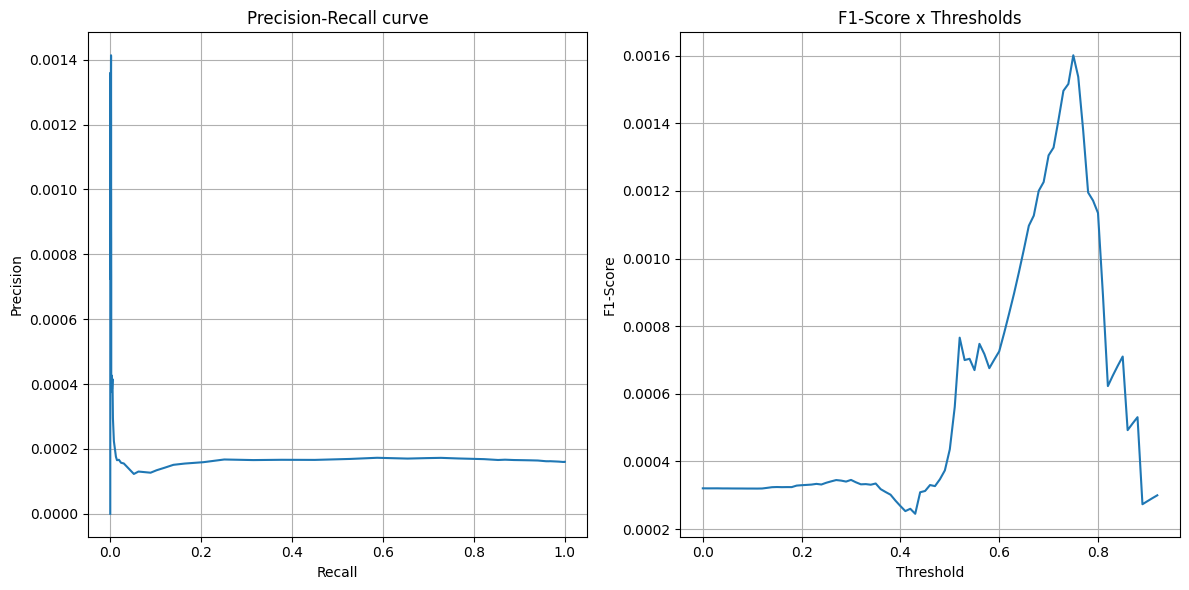

In [5]:
# Plot Precision-Recall curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(recall, prec, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.grid(True)

# Plot F1-Score x Thresholds
plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores, label='F1-Score for each threshold')  # Exclude the last value because it corresponds to recall = 0
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score x Thresholds')
plt.grid(True)

plt.tight_layout()
plt.show()